# Premiers pas en *matplotlib*

***
> __Auteur__: Joseph Salmon
> <joseph.salmon@umontpellier.fr>

<a id="sommaire"> </a>
## Sommaire

*  __[Import](#import)__ <br>
*  __[Améliorations visuelles](#style)__ <br>
*  __[Visualisations classiques](#visu)__ <br>

<a id="import"> </a>
##  Imports

In [1]:
import os
import sys
# utile pour avoir un affichage identique dans divers notebook
sys.path.append("./codes")

import numpy as np
import matplotlib.pyplot as plt

# commande "magique" pour améliorer la visualiation
%matplotlib notebook
# %matplotlib inline

<a id="style"> </a>

# Visualisation de données, seaborn et pandas

In [2]:
import seaborn as sns
import pandas as pd
dirname = "../prebuiltimages/"
imageformat = ".pdf"
def my_saving_display(fig, dirname, filename, imageformat,saving=True):
    """"Saving with personal function."""
    if saving is True:
        dirname + filename + imageformat
        image_name = dirname + filename + imageformat
        fig.savefig(image_name)

In [3]:
from download import download
url = "http://josephsalmon.eu/enseignement/datasets/belgianmunicipalities.csv"
path_target = "./belgianmunicipalities.csv"
download(url, path_target, replace=False)

Replace is False and data exists, so doing nothing. Use replace==True to re-download the data.


'./belgianmunicipalities.csv'

In [4]:
cat belgianmunicipalities.csv

"","Commune","INS","Province","Arrondiss","Men04","Women04","Tot04","Men03","Women03","Tot03","Diffmen","Diffwom","DiffTOT","TaxableIncome","Totaltaxation","averageincome","medianincome"
"1","Aartselaar",11001,1,11,6971,7169,14140,7010,7243,14253,-39,-74,-113,242104077,74976114,33809,23901
"2","Anvers",11002,1,11,223677,233642,457319,221767,232405,454172,1910,1237,3147,5416418842,1423715652,22072,17226
"3","Boechout",11004,1,11,6027,5927,11954,6005,5942,11947,22,-15,7,167616996,50739035,29453,21613
"4","Boom",11005,1,11,7640,8066,15706,7535,7952,15487,105,114,219,186075961,46636930,21907,17537
"5","Borsbeek",11007,1,11,4948,5328,10276,4951,5322,10273,-3,6,3,143225590,40564374,26632,20739
"6","Brasschaat",11008,1,11,18142,18916,37058,18217,18903,37120,-75,13,-62,533368826,153629397,30574,21523
"7","Brecht",11009,1,11,12975,12976,25951,12863,12857,25720,112,119,231,325084836,86691504,25389,19833
"8","Edegem",11013,1,11,10614,11257,21871,10657,11298,21955,-43,-41,-84,337602904,102711766,3

In [5]:
df_belgium = pd.read_csv(path_target, index_col='Commune')
df_belgium = df_belgium.drop(['Unnamed: 0'],  axis=1)
df_belgium.head()

,INS,Province,Arrondiss,Men04,Women04,Tot04,Men03,Women03,Tot03,Diffmen,Diffwom,DiffTOT,TaxableIncome,Totaltaxation,averageincome,medianincome
Commune,,,,,,,,,,,,,,,,
Aartselaar,11001,1,11,6971,7169,14140,7010,7243,14253,-39,-74,-113,242104077,74976114,33809,23901
Anvers,11002,1,11,223677,233642,457319,221767,232405,454172,1910,1237,3147,5416418842,1423715652,22072,17226
Boechout,11004,1,11,6027,5927,11954,6005,5942,11947,22,-15,7,167616996,50739035,29453,21613
Boom,11005,1,11,7640,8066,15706,7535,7952,15487,105,114,219,186075961,46636930,21907,17537
Borsbeek,11007,1,11,4948,5328,10276,4951,5322,10273,-3,6,3,143225590,40564374,26632,20739


In [6]:
dictionnaire = {1: 'Anv.', 2: 'Brab.', 3: 'Fl.occ.',
                4: 'Fl.or.', 5: 'Hainaut', 6: 'Liège',
                7: 'Limb.', 8: 'Lux.', 9: 'Namur'}
df_belgium = df_belgium.replace({'Province': dictionnaire})

In [7]:
nb_samples = df_belgium.count()[0]

In [8]:
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D

# Random setting
X = df_belgium['medianincome']
y = np.ones(nb_samples,) + 0.05 * np.random.randn(nb_samples,)

# Various statistics:
meanX = np.mean(X)  # mean
minX = np.min(X)  # min
maxX = np.max(X)  # max
medX = np.median(X)  # median
MADX = np.median(np.abs(X - medX))  # mean absolute deviation
s = np.std(X)  # standard deviation

alpha_trim = 0.15
tmeanX = stats.trim_mean(X, alpha_trim)  # trimmed mean (level: alpha_trim)

brown = (0.64, 0.16, 0.16)
purple = (148. / 255, 0, 211. / 255)

<IPython.core.display.Javascript object>


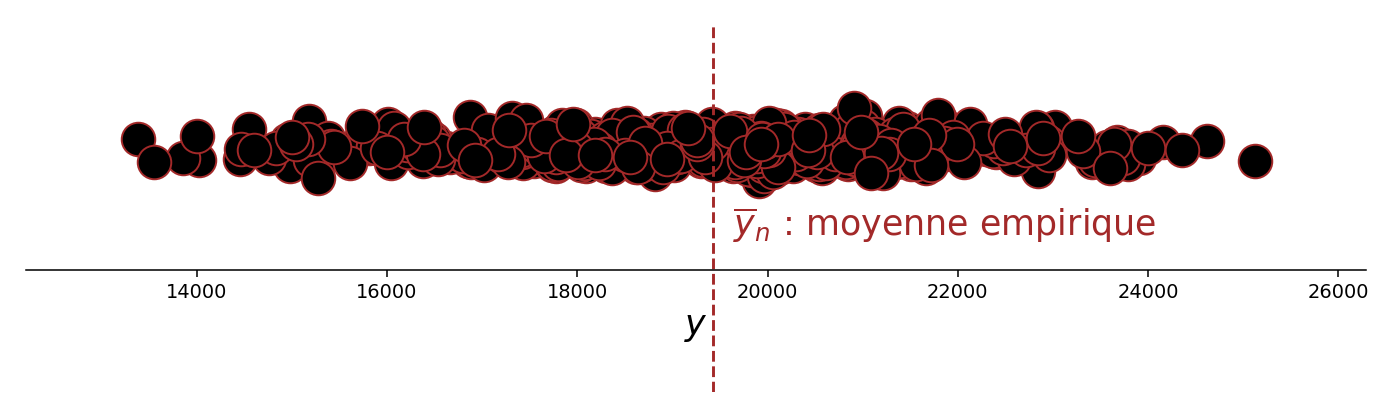

In [9]:
fig1, ax = plt.subplots(figsize=(10, 3))
ax.set_ylim(0, 1.5)
ax.set_xlim(minX - 0.1 * np.ptp(X), maxX + 0.1 * np.ptp(X))
ax.get_xaxis().tick_bottom()
ax.axes.get_yaxis().set_visible(False)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0.5))
ax.spines['left'].set_color('none')

ax.scatter(X, y, c='black', s=300, marker='o', edgecolors=brown, lw='1')
ax.plot([meanX, meanX], [0, 1.5], color=brown, lw=1.5, ls="--")

plt.xlabel(r'$y$', fontsize=18)
plt.annotate(r'$\overline{y}_n$ : moyenne empirique',
             xy=(meanX, 0.4), xycoords='data', xytext=(+10, +30),
             textcoords='offset points', fontsize=18, color=brown)

plt.tight_layout()
plt.show()

my_saving_display(fig1, dirname, "GammaSampleMean", imageformat)

<IPython.core.display.Javascript object>


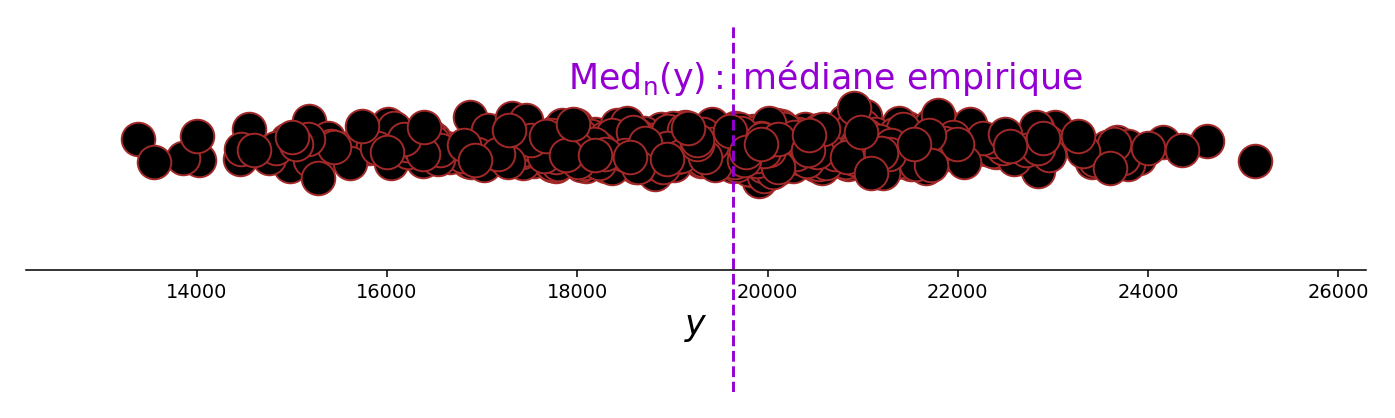

In [10]:
fig1, ax = plt.subplots(figsize=(10, 3))
ax.set_ylim(0, 1.5)
ax.set_xlim(minX - 0.1 * np.ptp(X), maxX + 0.1 * np.ptp(X))
ax.get_xaxis().tick_bottom()
ax.axes.get_yaxis().set_visible(False)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0.5))
ax.spines['left'].set_color('none')

ax.scatter(X, y, c='black', s=300, marker='o', edgecolors=brown, lw='1')

ax.plot([medX, medX], [0, 1.5], color=purple, lw=1.5, ls="--")
plt.xlabel(r'$y$', fontsize=18)
plt.annotate(r'$\rm{Med}_n(y):$ médiane empirique',
             xy=(medX, 1), xycoords='data', xytext=(-85, +30),
             textcoords='offset points', fontsize=18, color=purple)

plt.tight_layout()
plt.show()

my_saving_display(fig1, dirname, "GammaSampleMediane", imageformat)

<IPython.core.display.Javascript object>


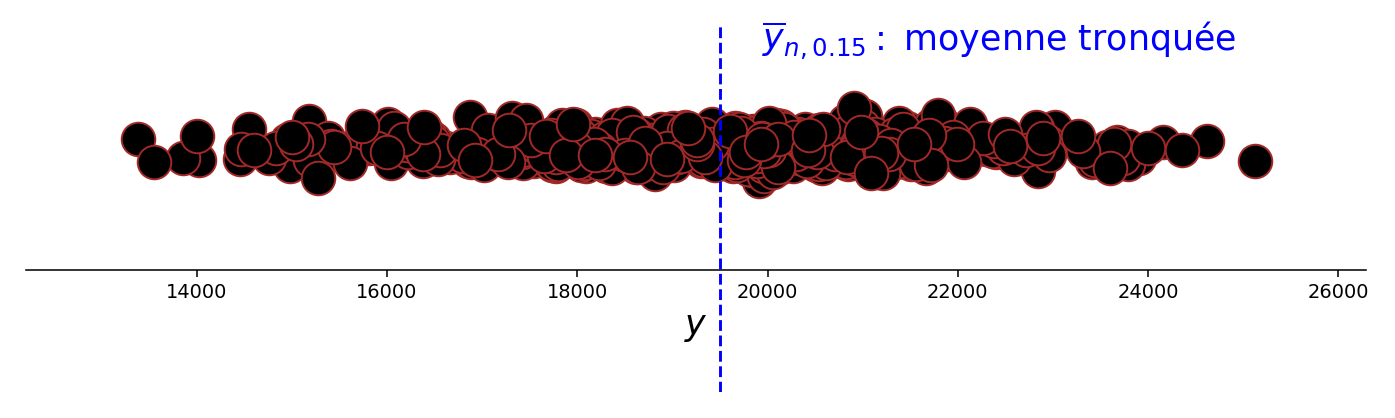

In [11]:
fig1, ax = plt.subplots(figsize=(10, 3))
ax.set_ylim(0, 1.5)
ax.set_xlim(minX - 0.1 * np.ptp(X), maxX + 0.1 * np.ptp(X))
ax.get_xaxis().tick_bottom()
ax.axes.get_yaxis().set_visible(False)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0.5))
ax.spines['left'].set_color('none')

ax.scatter(X, y, c='black', s=300, marker='o', edgecolors=brown, lw='1')

ax.plot([tmeanX, tmeanX], [0, 1.5], c='blue', lw=1.5, ls="--")
plt.xlabel(r'$y$', fontsize=18)
tt = "$\overline{y}_{n,%s} :$ moyenne tronquée" % str(alpha_trim)
plt.annotate(tt, xy=(tmeanX, 1), xycoords='data', xytext=(+22, +50),
             textcoords='offset points', fontsize=18, color='blue')

plt.tight_layout()
plt.show()

my_saving_display(fig1, dirname, "GammaSampleTrimmed", imageformat)


<IPython.core.display.Javascript object>


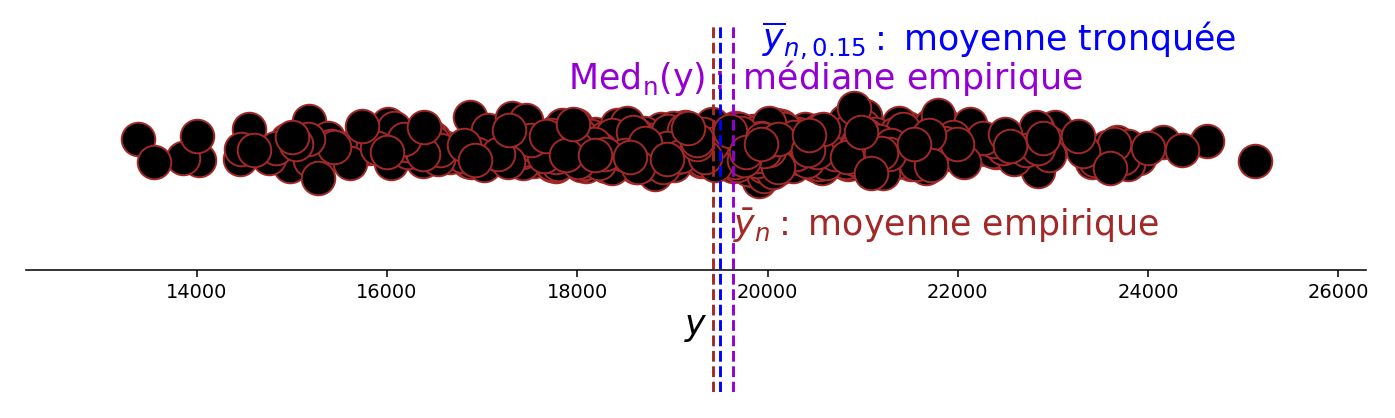

In [12]:
fig1, ax = plt.subplots(figsize=(10, 3))
ax.set_ylim(0, 1.5)
ax.set_xlim(minX - 0.1 * np.ptp(X), maxX + 0.1 * np.ptp(X))
ax.get_xaxis().tick_bottom()
ax.axes.get_yaxis().set_visible(False)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0.5))
ax.spines['left'].set_color('none')

ax.scatter(X, y, c='black', s=300, marker='o', edgecolors=brown, lw='1')

ax.plot([meanX, meanX], [0, 1.5], color=brown, lw=1.5, ls="--")
ax.plot([medX, medX], [0, 1.5], color=purple, lw=1.5, ls="--")
ax.plot([tmeanX, tmeanX], [0, 1.5], color='blue',
        lw=1.5, ls="--")

plt.xlabel(r'$y$', fontsize=18)
plt.annotate(r'$\rm{Med}_n(y):$ médiane empirique',
             xy=(medX, 1), xycoords='data', xytext=(-85, +30),
             textcoords='offset points', fontsize=18, color=purple)
plt.annotate(r'$\bar{y}_n :$ moyenne empirique', xy=(meanX, 0.4),
             xycoords='data', xytext=(+10, +30), textcoords='offset points',
             fontsize=18, color=brown)
plt.annotate(tt, xy=(tmeanX, 1), xycoords='data', xytext=(+22, +50),
             textcoords='offset points', fontsize=18, color='blue')

plt.tight_layout()
plt.show()

my_saving_display(fig1, dirname, "GammaSampleMedianeMean", imageformat)

<IPython.core.display.Javascript object>


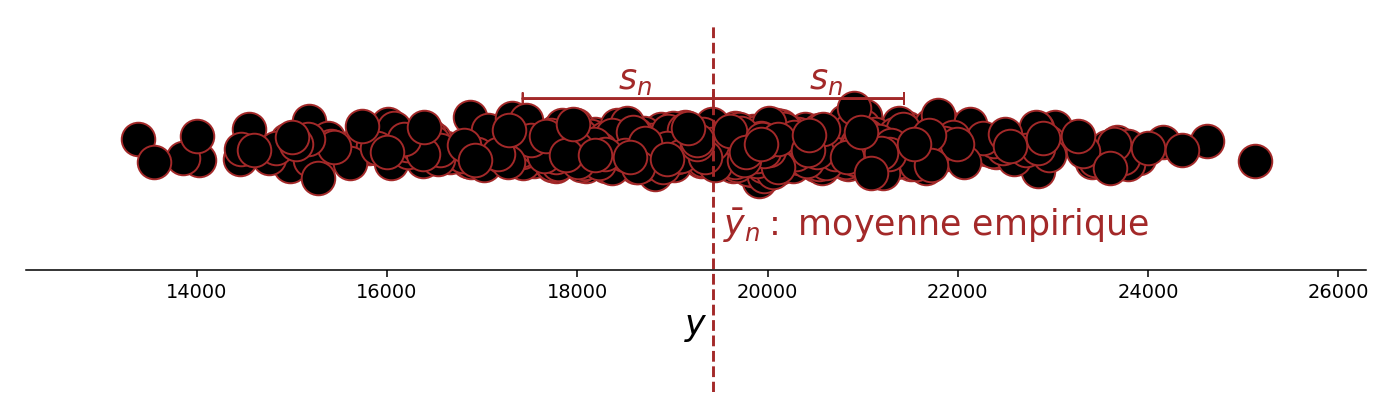

In [13]:
fig1, ax = plt.subplots(figsize=(10, 3))
ax.set_ylim(0, 1.5)
ax.set_xlim(minX - 0.1 * np.ptp(X), maxX + 0.1 * np.ptp(X))
ax.get_xaxis().tick_bottom()
ax.axes.get_yaxis().set_visible(False)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0.5))
ax.spines['left'].set_color('none')

ax.scatter(X, y, c='black', s=300, marker='o', edgecolors=brown, lw='1')
ax.plot([meanX, meanX], [0, 1.5], color=brown, lw=1.5, ls="--")

plt.arrow(meanX, 1.2, -s, 0, fc=brown, ec=brown,
          head_width=0.05, head_length=0.1, length_includes_head=True)
plt.arrow(meanX - s, 1.2, s, 0, fc=brown, ec=brown,
          head_width=0.05, head_length=0.1, length_includes_head=True)
plt.arrow(meanX, 1.2, s, 0, fc=brown, ec=brown,
          head_width=0.05, head_length=0.1, length_includes_head=True)
plt.arrow(meanX + s, 1.2, -s, 0, fc=brown, ec=brown,
          head_width=0.05, head_length=0.1, length_includes_head=True)

plt.xlabel(r'$y$', fontsize=18)

plt.annotate(r'$\bar{y}_n :$ moyenne empirique',
             xy=(meanX, 0.4), xycoords='data', xytext=(+5, +30),
             textcoords='offset points', fontsize=18, color=brown)
plt.annotate(r'$s_n$', xy=(meanX + s * (0.4), 1), xycoords='data',
             xytext=(+10, +30), textcoords='offset points', fontsize=18,
             color=brown)
plt.annotate(r'$s_n$', xy=(meanX - s * (0.6), 1), xycoords='data',
             xytext=(+10, +30), textcoords='offset points', fontsize=18,
             color=brown)

plt.tight_layout()
plt.show()

my_saving_display(fig1, dirname, "GammaSD", imageformat)

<IPython.core.display.Javascript object>


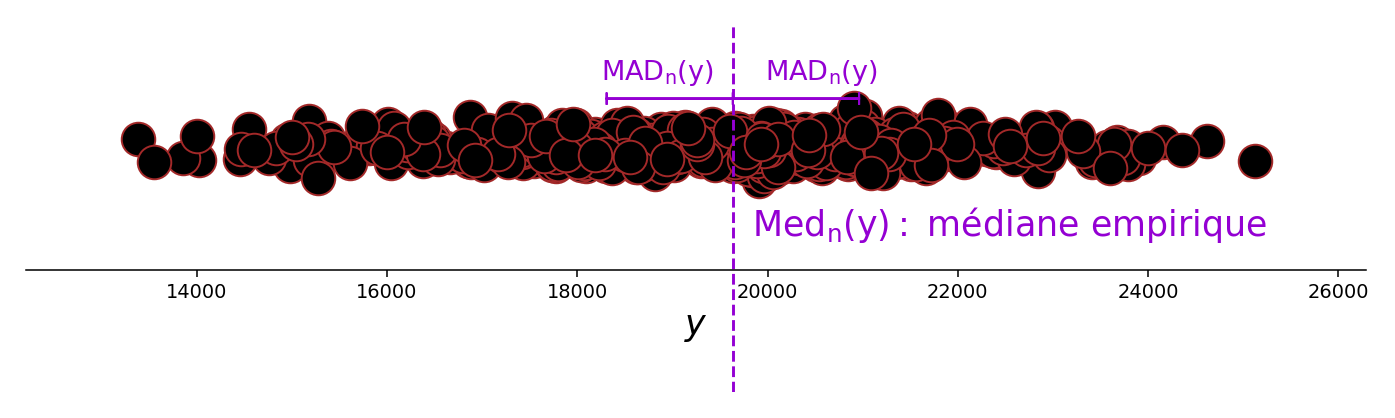

In [14]:
fig1, ax = plt.subplots(figsize=(10, 3))
ax.set_ylim(0, 1.5)
ax.set_xlim(minX - 0.1 * np.ptp(X), maxX + 0.1 * np.ptp(X))
ax.get_xaxis().tick_bottom()
ax.axes.get_yaxis().set_visible(False)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0.5))
ax.spines['left'].set_color('none')

ax.scatter(X, y, c='black', s=300, marker='o', edgecolors=brown, lw='1')
ax.plot([medX, medX], [0, 1.5], color=purple, lw=1.5, ls="--")

plt.arrow(medX, 1.2, -MADX, 0, fc=purple, ec=purple, head_width=0.05,
          head_length=0.1, length_includes_head=True)
plt.arrow(medX - MADX, 1.2, MADX, 0, fc=purple, ec=purple, head_width=0.05,
          head_length=0.1, length_includes_head=True)
plt.arrow(medX, 1.2, MADX, 0, fc=purple, ec=purple, head_width=0.05,
          head_length=0.1, length_includes_head=True)
plt.arrow(medX + MADX, 1.2, -MADX, 0, fc=purple, ec=purple, head_width=0.05,
          head_length=0.1, length_includes_head=True)

plt.xlabel(r'$y$', fontsize=18)

plt.annotate(r'$\rm{Med}_n(y):$ médiane empirique',
             xy=(medX, 0.4), xycoords='data', xytext=(+10, +30),
             textcoords='offset points', fontsize=18, color=purple)
plt.annotate(r'$\rm{MAD}_n(y)$', xy=(medX + MADX * (0.1), 1),
             xycoords='data', xytext=(+10, +35), textcoords='offset points',
             fontsize=14, color=purple)
plt.annotate(r'$\rm{MAD}_n(y)$', xy=(medX - MADX * (1.2), 1),
             xycoords='data', xytext=(+10, +35), textcoords='offset points',
             fontsize=14, color=purple)

plt.tight_layout()
plt.show()

my_saving_display(fig1, dirname, "GammaMAD", imageformat)

# Histogramme global

<IPython.core.display.Javascript object>


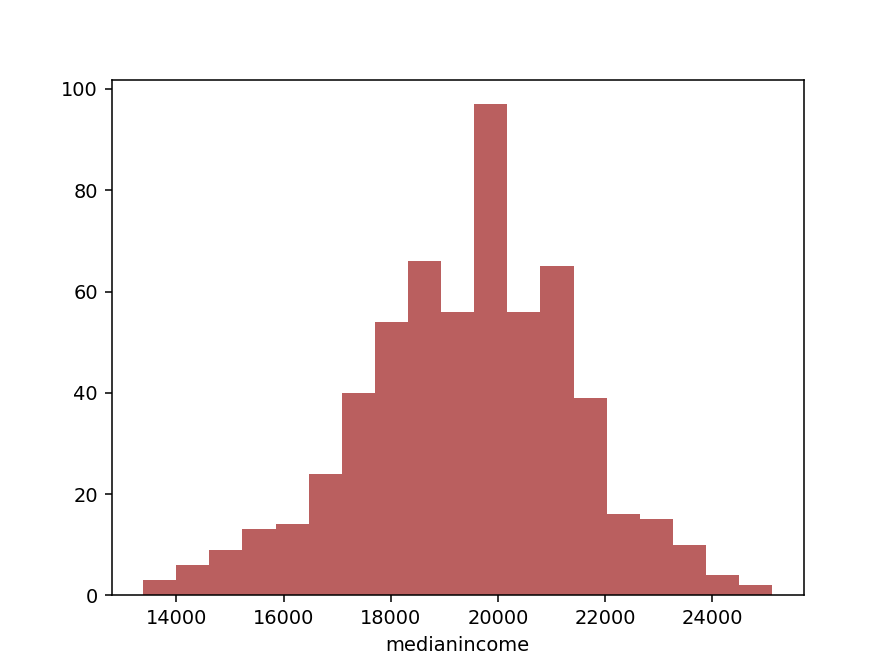

In [15]:
plt.figure()
g = sns.distplot(df_belgium['medianincome'], kde=False, rug=False,
                 hist_kws={"linewidth": 1, "alpha": 0.75, "color": brown});
fig = g.get_figure()

filename = "belgianmunicipalities_hist"
image_name = os.path.join(dirname, filename + imageformat)
fig.savefig(image_name, bbox_inches='tight')


<IPython.core.display.Javascript object>


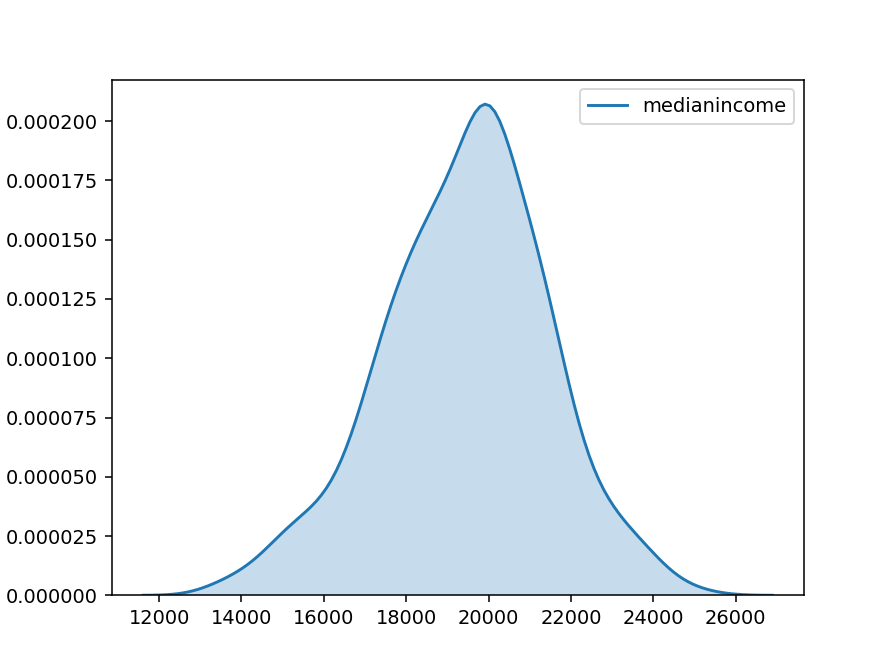

In [16]:
plt.figure()
# g = sns.distplot(df_belgium['medianincome'], kde=False, rug=False,
#                  hist_kws={"linewidth": 1, "alpha": 0.75, "color": brown});
g = sns.kdeplot(df_belgium['medianincome'], shade=True);
fig = g.get_figure()

filename = "belgianmunicipalities_kde"
image_name = os.path.join(dirname, filename + imageformat)
fig.savefig(image_name, bbox_inches='tight')

<IPython.core.display.Javascript object>


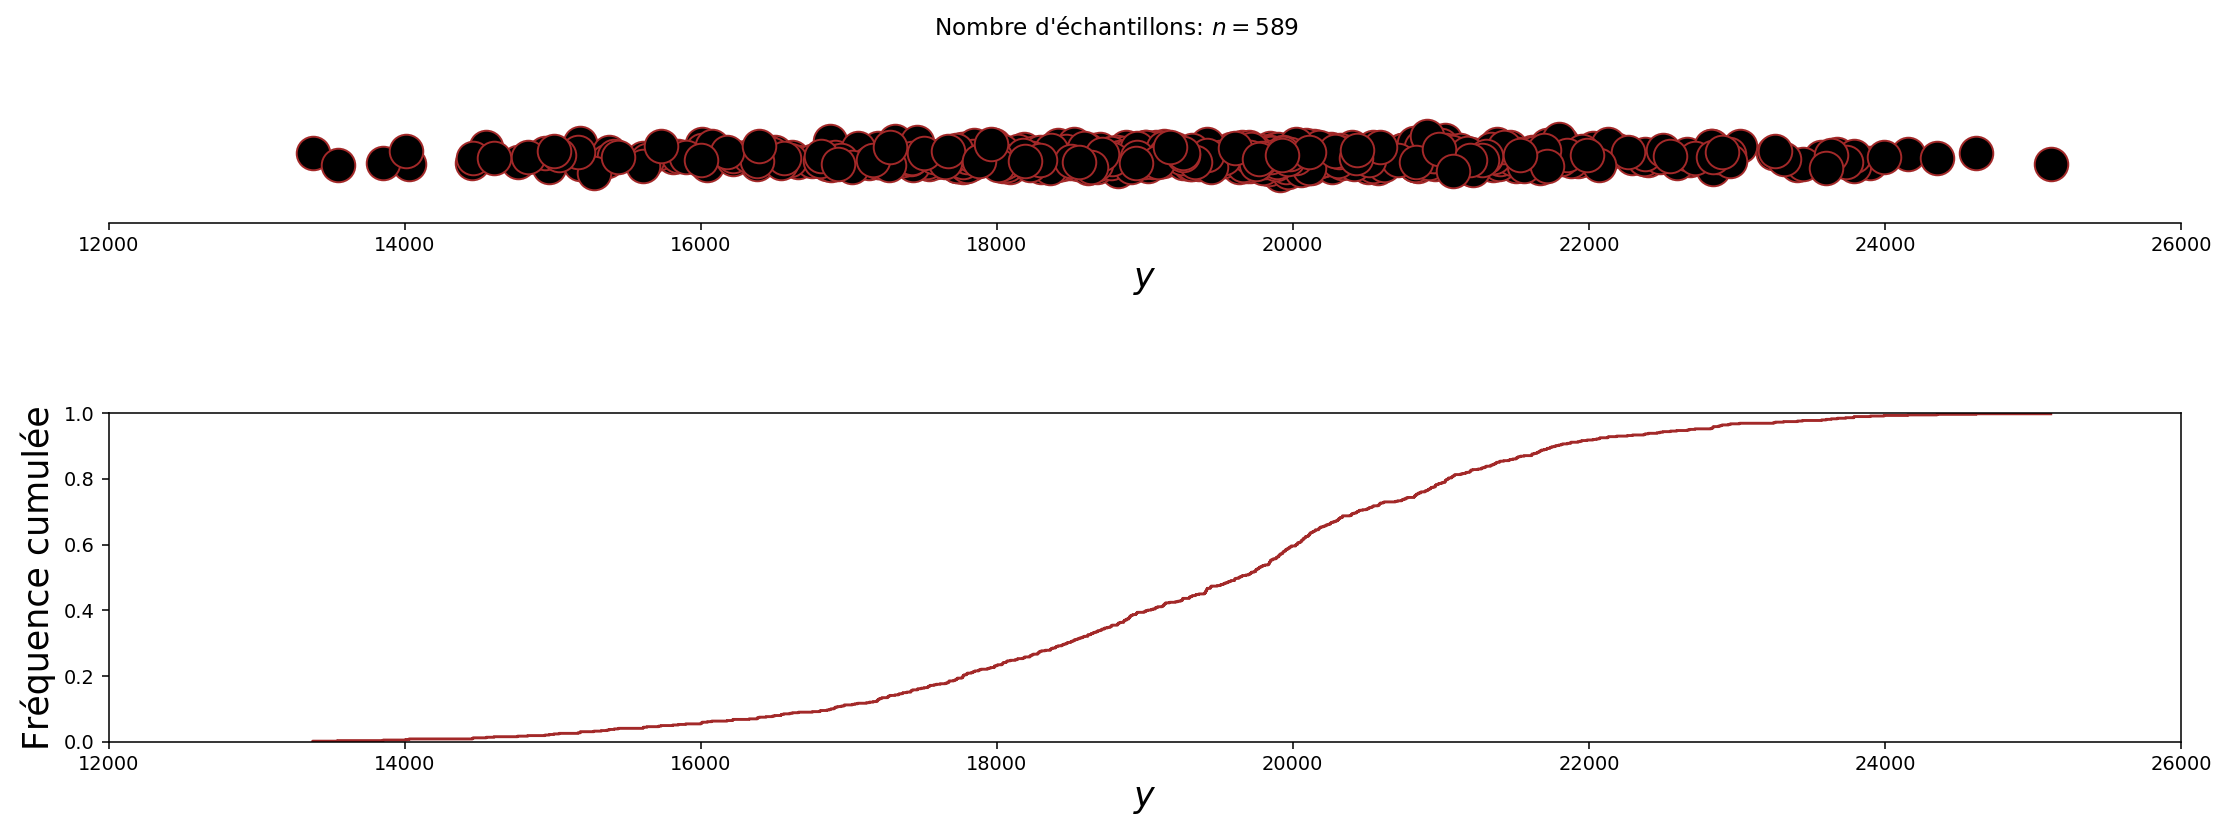

In [17]:
yrange_lim_down = (0., 1.)
yrange_lim_up = (-0.5, 2)
yrange_lim = (-0.1, 0.5)
xrange_lim = (12000, 26000)

sorted_data = np.sort(X)


fig1 = plt.figure(figsize=(16, 6))
plt.subplots_adjust(hspace=0.3)
ax = fig1.add_subplot(211)
ax.set_ylim(yrange_lim_up)
ax.set_xlim(xrange_lim)
ax.get_xaxis().tick_bottom()
ax.axes.get_yaxis().set_visible(False)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0.5))
ax.spines['left'].set_color('none')

ax.scatter(X, y, c='black', s=300, marker='o', edgecolors=brown, lw='1')

plt.xlabel(r'$y$', fontsize=18)
plt.suptitle(r"Nombre d'échantillons: " + "$n={0}$".format(nb_samples),
             multialignment='center')

ax2 = fig1.add_subplot(212)
ax2.set_xlim(xrange_lim)
ax2.set_ylim(yrange_lim_down)
plt.step(sorted_data, np.arange(sorted_data.size, dtype='float') / nb_samples,
         color=brown)
plt.ylabel(r'Fréquence cumulée', fontsize=18)
plt.xlabel(r'$y$', fontsize=18)
plt.tight_layout()
plt.show()

my_saving_display(fig1, dirname, "Gammaecdf", imageformat)

<IPython.core.display.Javascript object>


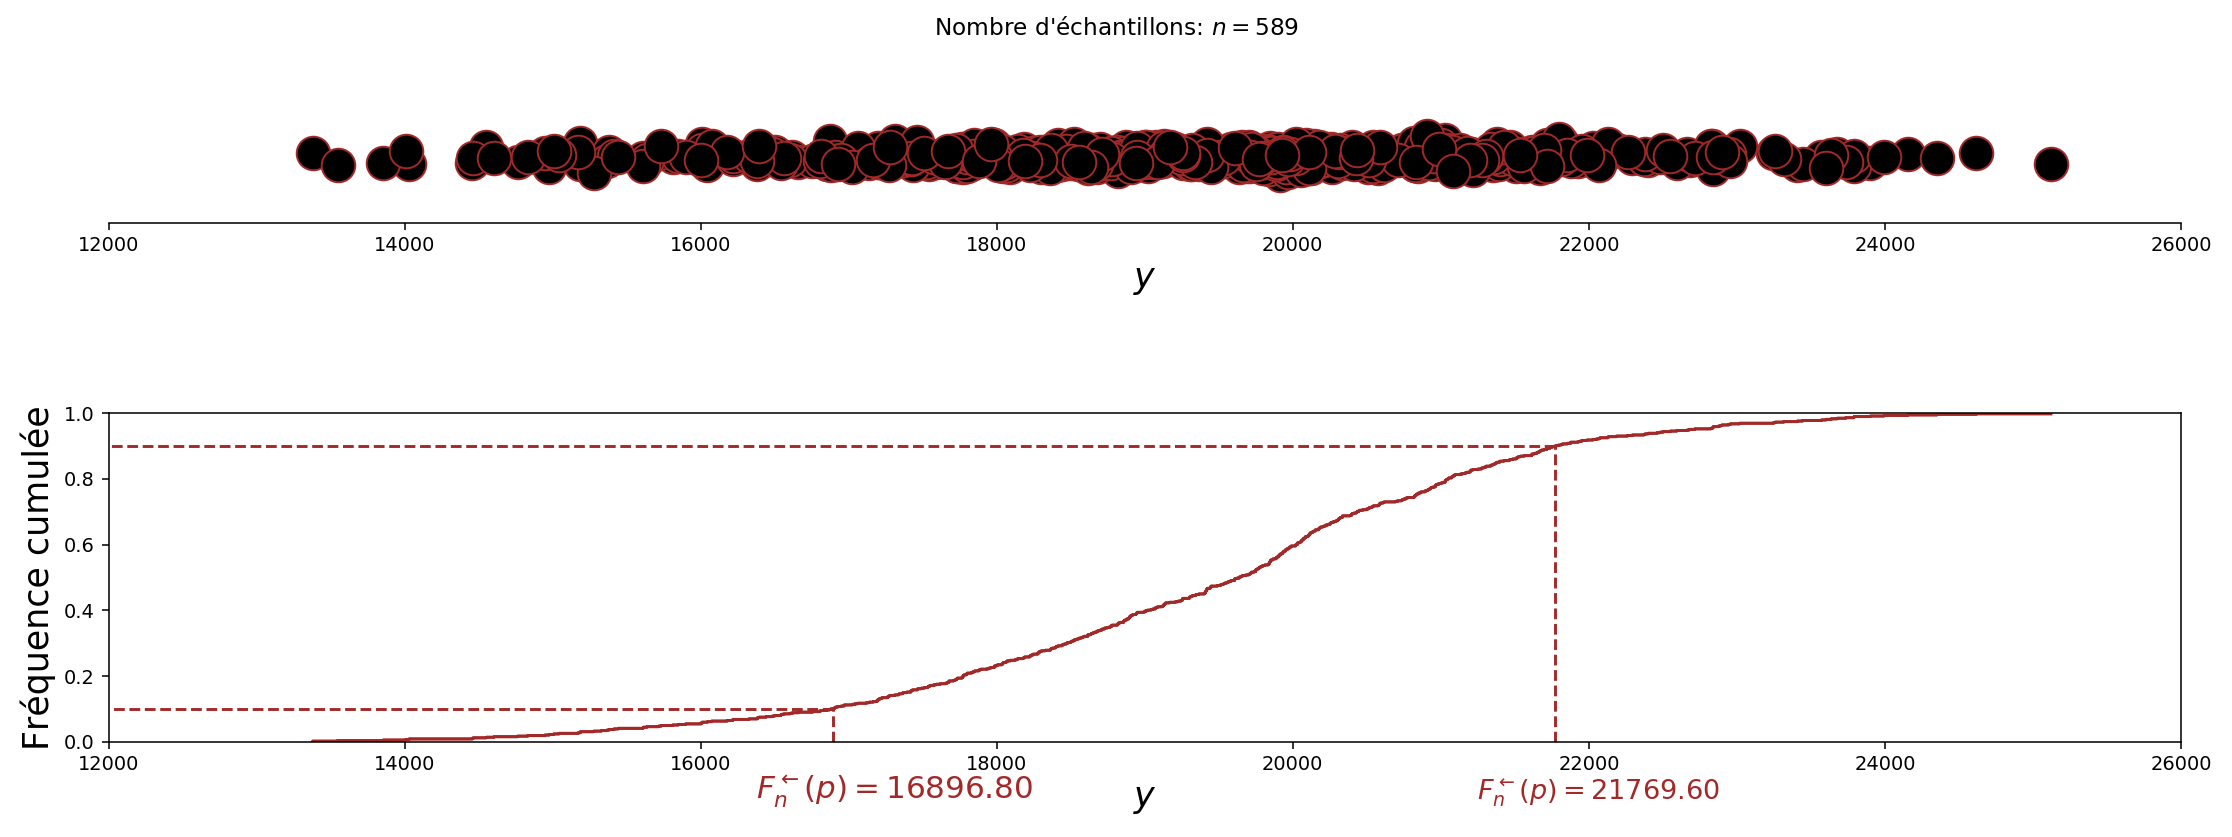

/home/jo/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [18]:
fig1 = plt.figure(figsize=(16, 6))
plt.subplots_adjust(hspace=0.3)
ax = fig1.add_subplot(211)
ax.set_ylim(yrange_lim_up)
ax.set_xlim(xrange_lim)
ax.get_xaxis().tick_bottom()
ax.axes.get_yaxis().set_visible(False)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0.5))
ax.spines['left'].set_color('none')

ax.scatter(X, y, c='black', s=300, marker='o', edgecolors=brown, lw='1')
plt.xlabel(r'$y$', fontsize=18)
plt.suptitle(r"Nombre d'échantillons: " + "$n={0}$".format(nb_samples),
             multialignment='center')

ax2 = fig1.add_subplot(212)
ax2.set_xlim(xrange_lim)
ax2.set_ylim(yrange_lim_down)
plt.step(sorted_data, np.arange(sorted_data.size, dtype='float') / nb_samples,
         color=brown)
plt.ylabel(r'$Fréquence cumulée$', fontsize=18)
plt.xlabel(r'$y$', fontsize=18)

plt.xlabel(r'$y$', fontsize=18)
plt.suptitle(r"Nombre d'échantillons: " + "$n={0}$".format(nb_samples),
             multialignment='center')

ax2 = fig1.add_subplot(212)
ax2.set_xlim(xrange_lim)
ax2.set_ylim(yrange_lim_down)

###############################################################################
# Quantile function: First value to display

p = 0.1
q = np.percentile(X, p * 100)

ax2.plot([q, xrange_lim[0]], [p, p], color=brown, lw=1.5, ls="--")
ax2.plot([q, q], [0, p], color=brown, lw=1.5, ls="--")
ax2.annotate(r'$p=%.2f$' % p, xy=(0, p), xycoords='data', xytext=(-23, +6),
             textcoords='offset points', fontsize=14, color=brown)
ax2.annotate(r'$F_n^\leftarrow(p)=%.2f$' % q, xy=(q, 0), xycoords='data',
             xytext=(-40, -30), textcoords='offset points', fontsize=16,
             color=brown)
###############################################################################
# Quantile function: Second value to display

p = 0.90
q = np.percentile(X, p * 100)

ax2.plot([q, xrange_lim[0]], [p, p], color=brown, lw=1.5, ls="--")
ax2.plot([q, q], [0, p], color=brown, lw=1.5, ls="--")
ax2.annotate(r'$p=%.2f$' % p, xy=(0, p), xycoords='data', xytext=(-23, +6),
             textcoords='offset points', fontsize=14, color=brown)
ax2.annotate(r'$F_n^\leftarrow(p)=%.2f$' % q, xy=(q, 0), xycoords='data',
             xytext=(-40, -30), textcoords='offset points',
             fontsize=14, color=brown)

plt.step(sorted_data, np.arange(sorted_data.size, dtype='float') / nb_samples,
         color=brown)
plt.ylabel(r'Fréquence cumulée', fontsize=18)
plt.xlabel(r'$y$', fontsize=18)

plt.tight_layout()
plt.show()
my_saving_display(fig1, dirname, "GammaQuantiles", imageformat)

<a id="visu"> </a>
# Visualisations classiques

## Barplots:
afficher la moyenne ou la médiane par région.



<IPython.core.display.Javascript object>


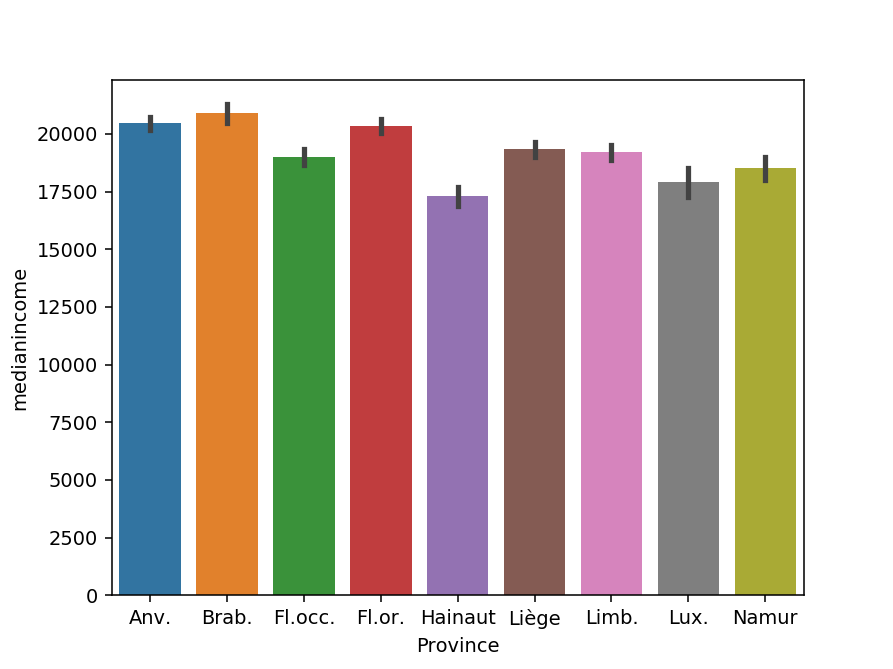

In [19]:
plt.figure()
fig_barplot = sns.barplot(x='Province', y='medianincome', data=df_belgium)

<IPython.core.display.Javascript object>


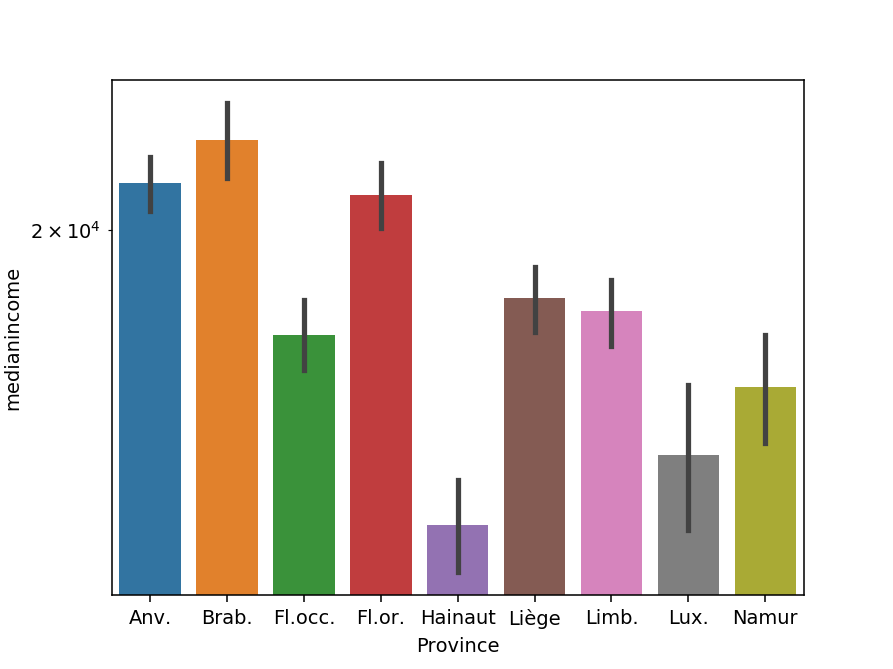

In [20]:
plt.figure()
fig_barplot = sns.barplot(x='Province', y='medianincome', data=df_belgium)
fig_barplot.set_yscale('log')


## Boxplots:
Visualiser la médiane, les quantiles 1/4 et 3/4, 1.5 inter-quartiles et outliers?
voir e.g. : http://www.itse.be/statistique2010/co/233_Cours_boxplot.html

<IPython.core.display.Javascript object>


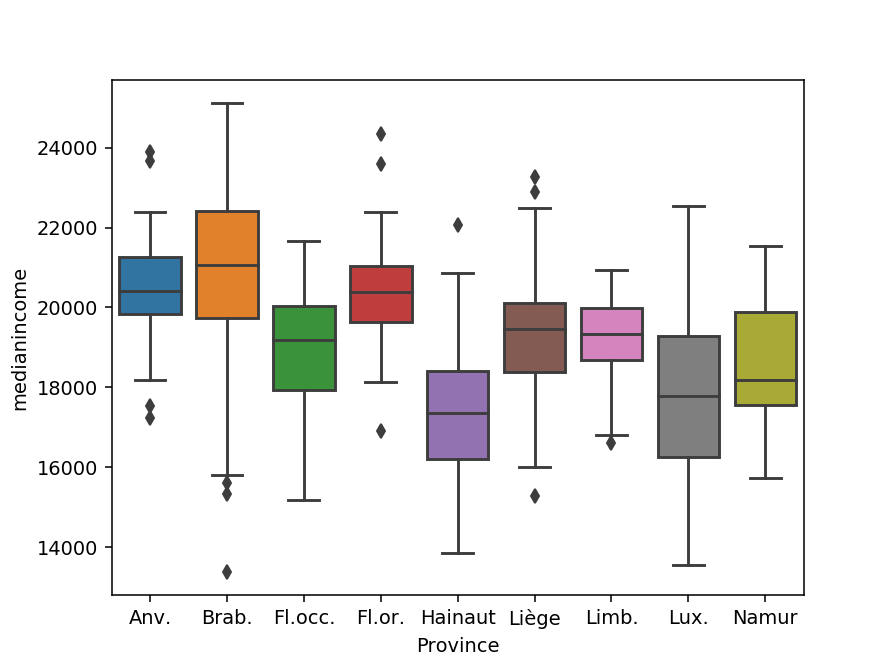

In [21]:
plt.figure()
fig_boxplot = sns.boxplot(x='Province', y='medianincome', data=df_belgium)

## Violons:
https://datavizcatalogue.com/methods/violin_plot.html

<IPython.core.display.Javascript object>


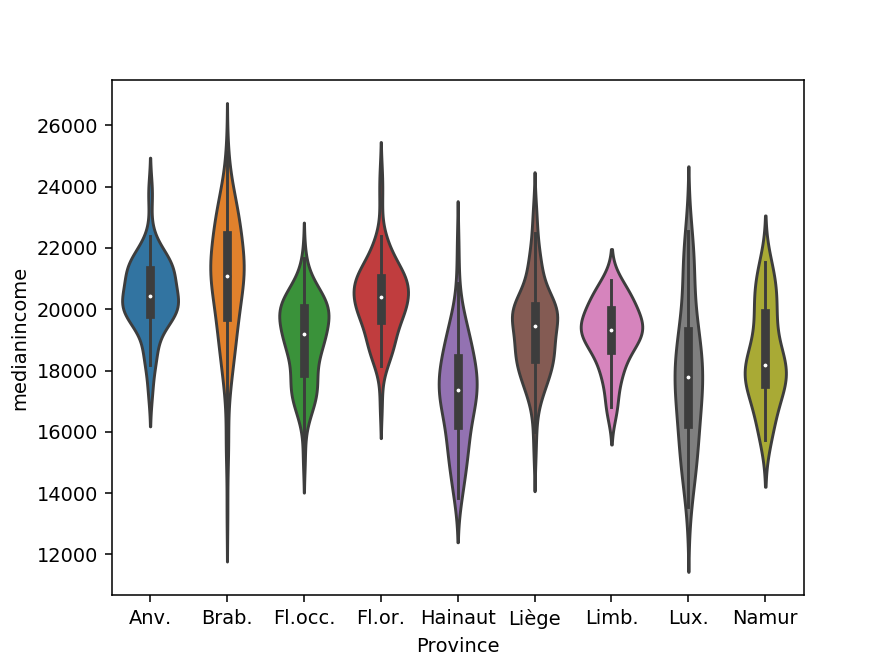

In [22]:
plt.figure()
sns.violinplot(x='Province', y='medianincome', data=df_belgium)

## Scatter plot (french: graphique de dispersion)
Corrélations entre la moyenne et la median des revenus

<IPython.core.display.Javascript object>


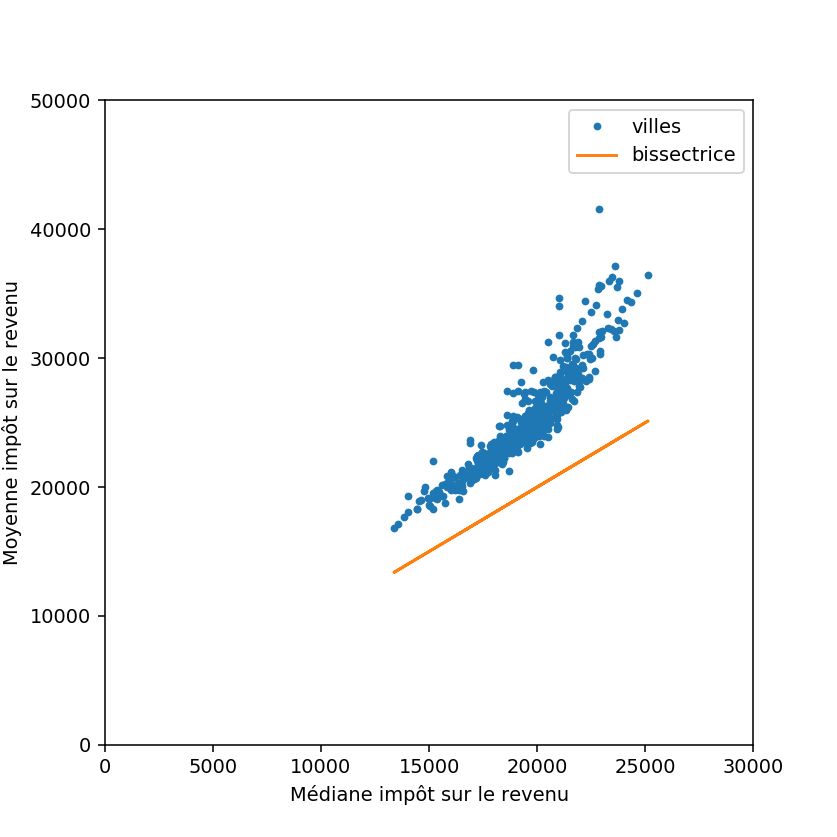

In [23]:
fig2 = plt.figure(figsize=(6, 6))
plt.plot(df_belgium['medianincome'],
         df_belgium['averageincome'], '.', label='villes')
plt.plot(df_belgium['medianincome'],
         df_belgium['medianincome'], label='bissectrice')
plt.xlabel('Médiane impôt sur le revenu')
plt.ylabel('Moyenne impôt sur le revenu')
plt.xlim((0, 30000))  # Démarre l'axe des x a 0 et fini a 30000
plt.ylim((0, 50000))  # Démarre l'axe des y a 0 et fini a 30000
plt.legend()


filename = "belgianmunicipalities"
image_name = os.path.join(dirname, filename + imageformat)
# fig2.savefig(image_name, bbox_inches='tight')

**Remarque**: la moyenne tire toujours la richesse d'une ville vers le haut par rapport à la médiane (un seul riche foyer ne change pas la médiane, mais change la moyenne potentiellement drastiquement).

## Scatter plot:
 ette fois on va afficher les points par couleur selon la région pour observer à une granularité plus précise

<IPython.core.display.Javascript object>


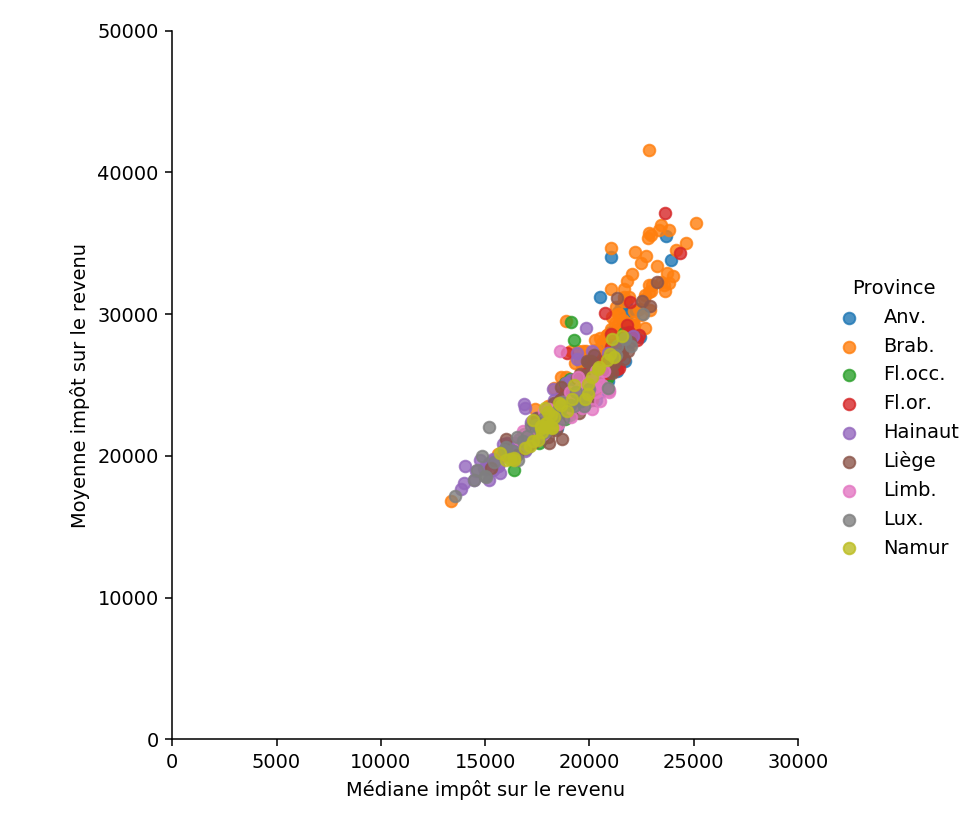

In [24]:
g = sns.lmplot(x='medianincome', y='averageincome',
           data=df_belgium, fit_reg=False, hue='Province')
g.fig.set_figheight(6)
g.fig.set_figwidth(7)
# plt.plot(df['medianincome'], df['medianincome'])
plt.xlabel('Médiane impôt sur le revenu')
plt.ylabel('Moyenne impôt sur le revenu')
plt.xlim((0, 30000))  # Démarre l'axe des x a 0 et fini a 30000
plt.ylim((0, 50000))  # Démarre l'axe des y a 0 et fini a 30000
filename = "belgianmunicipalities_clean"
image_name = os.path.join(dirname, filename + imageformat)
g.savefig(image_name, bbox_inches='tight')

<IPython.core.display.Javascript object>


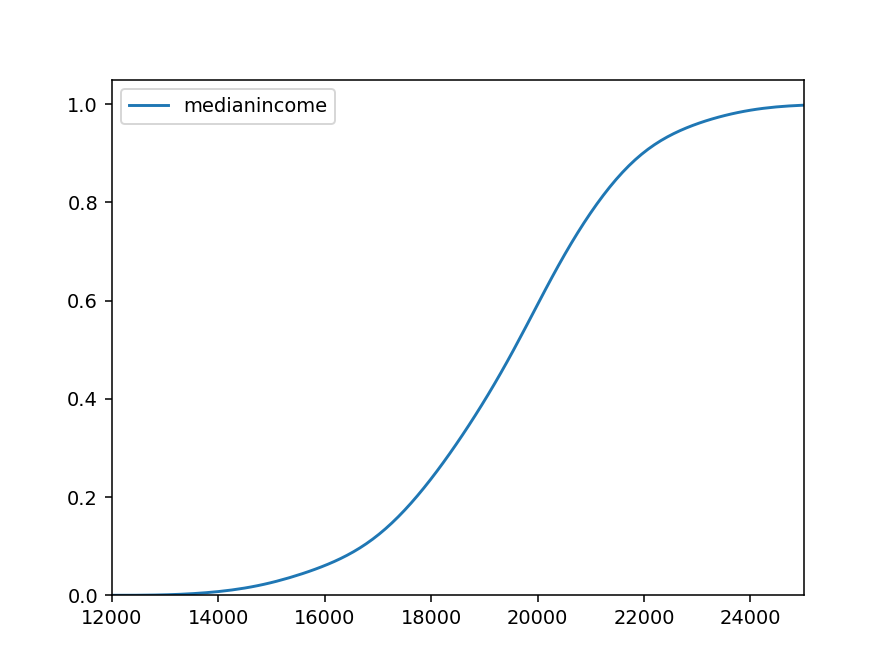

In [25]:
import seaborn as sns
plt.figure()
plt.xlim(12000, 25000)
cdf_plot=sns.kdeplot(df_belgium['medianincome'], cumulative=True)

<IPython.core.display.Javascript object>


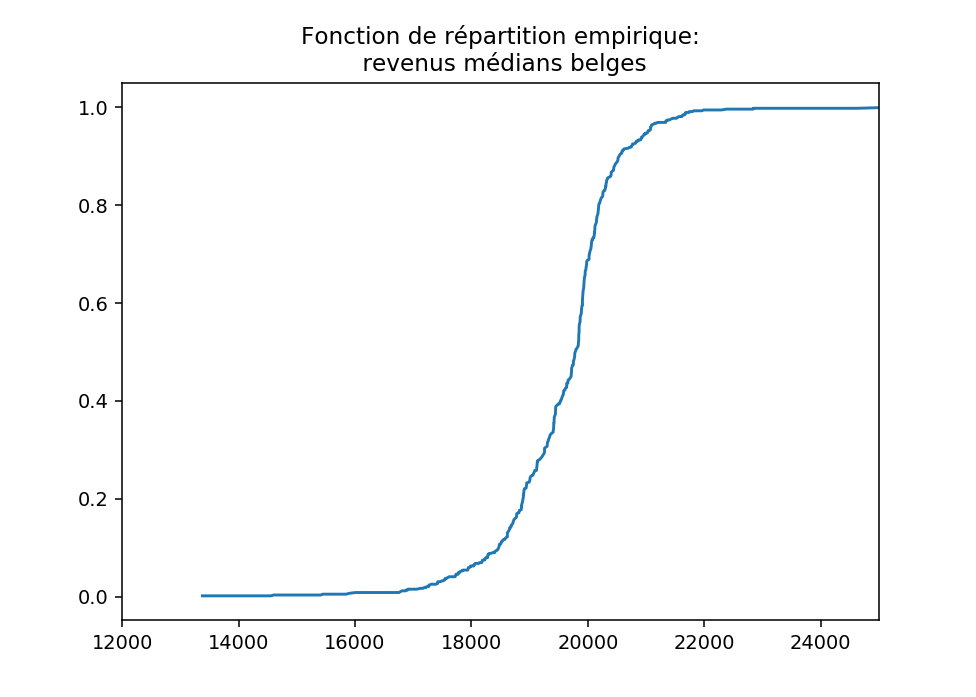

In [26]:
n_counts, bin_edges = np.histogram(
    df_belgium['medianincome'], bins=df_belgium['medianincome'].count(), normed=True)
cdf = np.cumsum(n_counts)  # cdf not normalized, despite above
scale = 1.0 / cdf[-1]
ncdf = scale * cdf
fig_cdf = plt.figure(figsize=(7, 5))
plt.plot(np.sort(df_belgium['medianincome']), ncdf)
plt.xlim(12000, 25000)
plt.title('Fonction de répartition empirique:\n revenus médians belges')
filename = "belgianmunicipalities_median_cdf"
image_name = os.path.join(dirname, filename + imageformat)
fig_cdf.savefig(image_name, bbox_inches='tight')

<IPython.core.display.Javascript object>


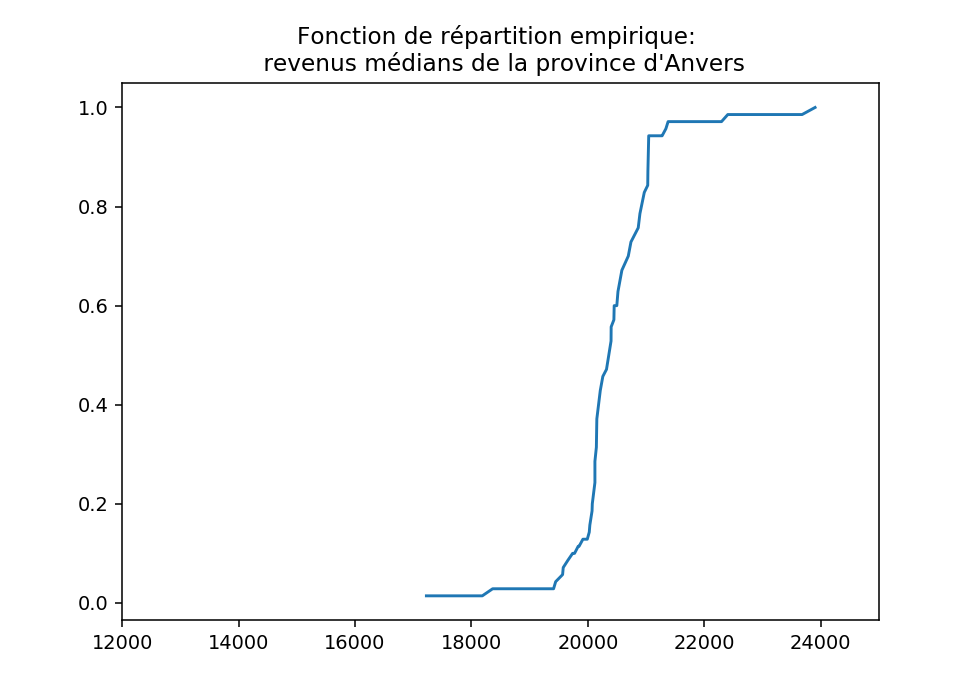

In [27]:
df_belgium_1 = df_belgium[df_belgium["Province"] == "Anv."]
n_counts, bin_edges = np.histogram(
    df_belgium_1['medianincome'], bins=df_belgium_1['medianincome'].count(), normed=True)
cdf = np.cumsum(n_counts)  # cdf not normalized, despite above
scale = 1.0 / cdf[-1]
ncdf = scale * cdf
fig_cdf_anv = plt.figure(figsize=(7,5))
plt.plot(np.sort(df_belgium_1['medianincome']), ncdf)
plt.title("Fonction de répartition empirique: \n revenus médians de la province d'Anvers")
plt.xlim(12000,25000)

filename = "belgianmunicipalities_anvers_cdf"
image_name = os.path.join(dirname, filename + imageformat)
fig_cdf_anv.savefig(image_name, bbox_inches='tight')

In [28]:
np.percentile(df_belgium['averageincome'],
              [100 / 4, 100 / 2, 100 * 3 / 4])

array([22684., 24753., 26933.])

In [29]:
np.percentile(df_belgium['medianincome'],
              [100 / 4, 100 / 2, 3 * 100 / 4])

array([18137., 19636., 20826.])

In [30]:
np.var(df_belgium['medianincome'])

4014584.7996575553

In [31]:
np.std(df_belgium['medianincome'])

2003.6428822665869

In [32]:
quantiles =  np.percentile(df_belgium['medianincome'], [25, 75])
quantiles[1] - quantiles[0]

2689.0

In [33]:
quantiles =  np.percentile(df_belgium['averageincome'], [25, 75])
quantiles[1] - quantiles[0]

4249.0

# Boxplot / Boîte à moustache 

<IPython.core.display.Javascript object>


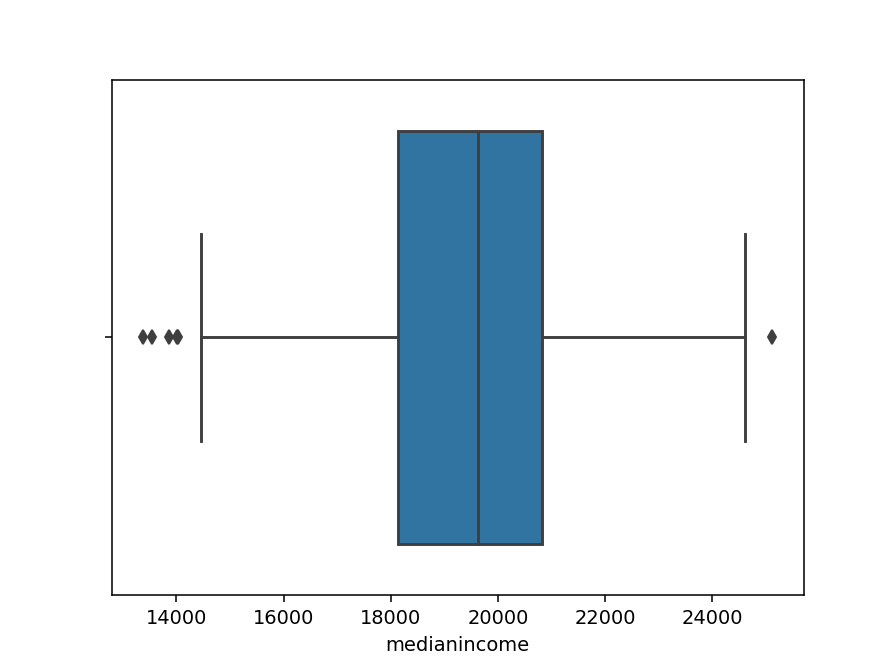

In [34]:
fig_boxplot = plt.figure()
ax = sns.boxplot(x=df_belgium['medianincome'])

filename = "belgianmunicipalities_boxplot"
image_name = os.path.join(dirname, filename + imageformat)
fig_boxplot.savefig(image_name, bbox_inches='tight')

/home/jo/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


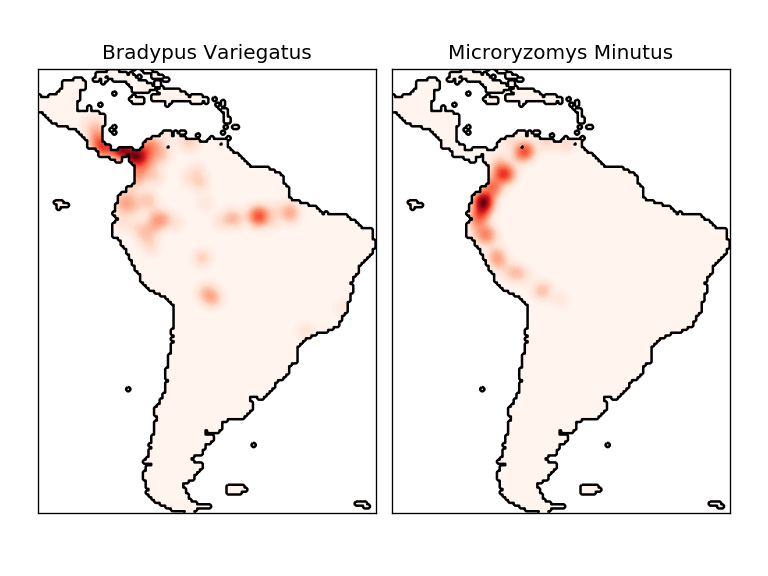

 - computing KDE in spherical coordinates
 - plot coastlines from coverage
 - computing KDE in spherical coordinates


/home/jo/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


 - plot coastlines from coverage


/home/jo/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


In [35]:
exec(open('plot_species_kde.py').read())
my_saving_display(fig_kde, dirname, "KDE2D", imageformat)